In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('EOW_MODEL_DATA_CLEANED_STAGE2.csv')

In [1]:
# df.head()

In [2]:
# df = df.iloc[:, 1:]
# df.head()

In [3]:
# df.dtypes

In [6]:
X = df.iloc[:,1:]
y = df['SYM_TOT_COST']

In [7]:
df['SYM_TOT_COST'].isnull().sum()

0

In [8]:
df['ACTUAL_PERIL'].isnull().sum()

0

In [9]:
df['ASBESTOS_PRESENT'].isnull().sum()

0

In [10]:
df['ALT_ACCOMDNTN_IND'].isnull().sum()

0

In [11]:
df['NLP_EOW_REASON'].isnull().sum()

0

In [12]:
df['MAX_FLOOR_SQM_DEC'].isnull().sum()

0

In [13]:
df['MAX_CEILING_SQM_DEC'].isnull().sum()

0

In [14]:
df['MAX_WALLS_SQM_DEC'].isnull().sum()

0

In [15]:
df['MAX_FLOOR_SQM'].isnull().sum()

0

In [16]:
df['MAX_CEILING_SQM'].isnull().sum()

0

In [17]:
df['MAX_WALLS_SQM'].isnull().sum()

0

In [18]:
df['MAX_ROOM_CNT'].isnull().sum()

0

In [19]:
df['ANY_DRYING_IND'].isnull().sum()

0

In [20]:
df['LOSS_YEAR'].isnull().sum()

0

In [21]:
df['LOSS_MONTH'].isnull().sum()

0

In [22]:
df['NPD_PROP_TYPE'].isnull().sum()

0

In [23]:
df['NPD_NO_BEDROOMS'].isnull().sum()

0

In [24]:
df['NPD_NO_BATHROOMS'].isnull().sum()

0

In [25]:
df['NPD_YOC'].isnull().sum()

0

In [26]:
print(X.shape)
print(y.shape)

(38791, 18)
(38791,)


In [27]:
# from sklearn.preprocessing import LabelEncoder

# X_en_1 = X.apply(LabelEncoder().fit_transform)

In [28]:
# X_en_1.head()

In [29]:
# X_ex = X.copy()

In [30]:
# X_ex.dtypes

In [31]:
# X_ex['ACTUAL_PERIL'] = X_ex['ACTUAL_PERIL'].astype('category')

In [32]:
# X_ex.dtypes

In [33]:
# X_ex['ASBESTOS_PRESENT'] = X_ex['ASBESTOS_PRESENT'].astype('category')
# X_ex['NLP_EOW_REASON'] = X_ex['NLP_EOW_REASON'].astype('category')
# X_ex['NPD_PROP_TYPE'] = X_ex['NPD_PROP_TYPE'].astype('category')

In [34]:
# X_ex.dtypes

In [35]:
# from sklearn.preprocessing import OneHotEncoder

#  X_en_2 = X.apply(OneHotEncoder().fit_transform)

In [36]:
# X_ex.dtypes

In [37]:
# X_en_3 = X_ex.apply(OneHotEncoder(categories = 'auto').fit_transform)

In [38]:
# ohe = OneHotEncoder()

In [39]:
# feats = ohe.fit_transform(X_ex.iloc[:, [0,1,3,14]])

In [40]:
# ohe.fit_transform(X_ex.iloc[:, 0])

In [41]:
# ohe.fit_transform(X_ex.iloc[:, 3])

In [42]:
# pd.get_dummies(X_ex).head()

In [43]:
# X_ex.iloc[:, 1].head()

In [44]:
# ohe.fit_transform(X_ex.iloc[:, 1])

In [45]:
# X_ex.iloc[:, [0,1,3, 14]].head()

In [8]:
df_cats = df.select_dtypes(include = ['object'])
df_nums = X.select_dtypes(exclude = ['object'])

In [4]:
# df_cats_ohe = pd.get_dummies(df_cats)
# df_cats_ohe.head()

In [10]:
df_cats_ohe.shape

(38791, 93)

In [5]:
# X_ohe = pd.concat([df_cats_ohe, df_nums], axis = 1)
# X_ohe.head()

In [12]:
X_ohe.shape

(38791, 107)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2, random_state = 2019)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31032, 107)
(7759, 107)
(31032,)
(7759,)


In [56]:
# from xgboost import XGBRegressor

In [57]:
# from xgboost.sklearn import XGBRegressor

In [15]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [23]:
mod_1 = XGBRegressor(objective = 'reg:squarederror',
                     n_estimators = 100,
                    random_state = 2019)

In [24]:
param_grid = {'learning_rate': [0.1, 0.2],
             'max_depth': [2,5],
             'subsample': [0.5, 0.8],
             'colsample_bytree': [0.5, 0.8]}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
grid = GridSearchCV(estimator = mod_1,
                   param_grid = param_grid,
                   scoring = 'r2')

In [6]:
# grid.fit(X_train, y_train)

In [28]:
grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'subsample': 0.8}

In [29]:
#1.sklearn wrapper
#2.xgb.train()

In [32]:
mod_2 = xgb.XGBRegressor(objective = 'reg:squarederror',
                        booster = 'gbtree',
                         n_estimators = 100,
                        colsample_bytree = 0.5,
                        learning_rate = 0.1,
                        max_depth = 5,
                        subsample = 0.8,
                        random_state = 2019)

In [33]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [7]:
# mod_2.fit(X_train, y_train,
#          eval_metric = 'rmse',
#          eval_set = eval_set,
#          early_stopping_rounds = 20)

In [35]:
y_test_pred1 = mod_2.predict(X_test)

In [8]:
# y_test_pred1

In [37]:
#xgboost.train() API

In [38]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [39]:
_params = {'colsample_bytree': 0.5,
          'learning_rate': 0.1,
          'max_depth': 5,
          'subsample': 0.8}

In [40]:
watch_list = [(dtrain, 'train'), (dtest, 'test')]

In [9]:
# mod_3 = xgb.train(params = _params,
#                  dtrain = dtrain,
#                  num_boost_round = 200,
#                  evals = watch_list,
#                  early_stopping_rounds = 20)

In [43]:
y_test_pred2 = mod_3.predict(dtest)

In [10]:
# y_test_pred2

In [45]:
import numpy as np

In [11]:
# np.corrcoef(y_test_pred1, y_test_pred2)

In [47]:
#SHAP values

In [48]:
import shap

In [49]:
X_importance = X_test

In [50]:
explainer = shap.TreeExplainer(mod_3)
shap_values = explainer.shap_values(X_importance)

In [12]:
# shap.summary_plot(shap_values, X_importance)

In [13]:
# shap.summary_plot(shap_values, X_importance, plot_type = 'bar')

In [14]:
# X_importance.MAX_FLOOR_SQM.value_counts()

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# plt.hist(X_importance.MAX_FLOOR_SQM, bins = 100)

In [16]:
# shap.dependence_plot("MAX_FLOOR_SQM", shap_values, X_importance)

In [17]:
# shap.dependence_plot('ANY_DRYING_IND', shap_values, X_importance)

In [18]:
# shap.dependence_plot('ALT_ACCOMDNTN_IND', shap_values, X_importance)

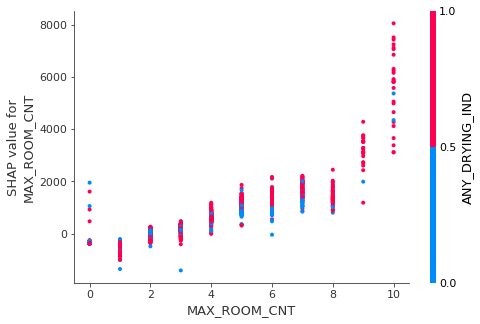

In [60]:
shap.dependence_plot('MAX_ROOM_CNT', shap_values, X_importance)

In [61]:
X_interaction = X_importance.iloc[:500, :]

shap_interaction_values = shap.TreeExplainer(mod_3).shap_interaction_values(X_interaction)

In [19]:
# shap.summary_plot(shap_interaction_values, X_interaction)

In [20]:
# shap.dependence_plot('MAX_FLOOR_SQM', shap_values, X_importance)

In [21]:
# shap.dependence_plot(('MAX_FLOOR_SQM', 'MAX_FLOOR_SQM'),
#                     shap_interaction_values,
#                     X_interaction)

In [22]:
# shap.dependence_plot(('MAX_FLOOR_SQM', 'ANY_DRYING_IND'),
#                     shap_interaction_values,
#                     X_interaction)

In [23]:
# shap_sum = np.abs(shap_values).mean(axis = 0)
# importance_df = pd.DataFrame([X_importance.columns.tolist(),
#                              shap_sum.tolist()]).T

# importance_df.columns = ['column_name', 'shap_importance']
# importance_df = importance_df.sort_values('shap_importance', ascending = False)
# importance_df

In [67]:
explainer_2 = shap.TreeExplainer(mod_2)
shap_values_2 = explainer_2.shap_values(X_importance)

In [24]:
# shap.summary_plot(shap_values_2, X_importance)

In [78]:
df_pred = pd.DataFrame({'SYM_TOT_COST_Test': y_test, 'XGB_1': y_test_pred1, 'XGB_2': y_test_pred2})

In [25]:
# df_pred.head()

In [81]:
import seaborn as sns

In [26]:
# sns.scatterplot(x = 'SYM_TOT_COST_Test', y = 'XGB_1', data = df_pred)

In [27]:
# sns.scatterplot(x = 'SYM_TOT_COST_Test', y = 'XGB_1', data = df_pred)
# plt.xlim(0, 200000)
# plt.ylim(0, 200000)

In [28]:
# sns.regplot(x = 'SYM_TOT_COST_Test', y = 'XGB_1', data = df_pred)

In [29]:
# sns.regplot(x = 'SYM_TOT_COST_Test', y = 'XGB_1', data = df_pred)
# plt.xlim(0, 200000)
# plt.ylim(0, 200000)

In [87]:
y_pred_all = mod_2.predict(X_ohe)

In [88]:
y_pred_all.shape

(38791,)

In [89]:
df.shape

(38791, 19)

In [90]:
df['Y_Pred_XGB2'] = y_pred_all

In [30]:
# df.head()

In [92]:
df.to_csv('EOW_STAGE2_XGB2_Pred.csv')

In [94]:
from joblib import dump

dump(mod_2, 'xgb2.joblib')
dump(mod_3, 'xgb3.joblib')

['xgb3.joblib']

In [31]:
# np.corrcoef(y_test_pred1, y_test)

In [32]:
# np.corrcoef(y_test_pred2, y_test)

In [33]:
# df_pred_melt = pd.melt(df_pred, value_vars = ['SYM_TOT_COST_Test', 'XGB_1', 'XGB_2'])
# df_pred_melt.head()

In [34]:
# p1 = sns.kdeplot(df_pred['SYM_TOT_COST_Test'], shade = True, color = 'r')
# p2 = sns.kdeplot(df_pred['XGB_1'], shade = True, color = 'b')
# p3 = sns.kdeplot(df_pred['XGB_2'], shade = True, color = 'y')

In [35]:
# p1 = sns.kdeplot(df_pred['SYM_TOT_COST_Test'], shade = True, color = 'r')
# p2 = sns.kdeplot(df_pred['XGB_1'], shade = True, color = 'b')
# p3 = sns.kdeplot(df_pred['XGB_2'], shade = True, color = 'y')
# plt.xlim(0, 25000)

In [36]:
# p1 = sns.kdeplot(df_pred['SYM_TOT_COST_Test'], shade = True, color = 'r')
# p2 = sns.kdeplot(df_pred['XGB_1'], shade = True, color = 'b')
# p3 = sns.kdeplot(df_pred['XGB_2'], shade = True, color = 'y')
# plt.xlim(0, 10000)

In [37]:
# p1 = sns.distplot(df_pred['SYM_TOT_COST_Test'], color = 'r', hist = False, label = 'True')
# p2 = sns.distplot(df_pred['XGB_1'], color = 'b', hist = False, label = 'XGB_1')
# p3 = sns.distplot(df_pred['XGB_2'], color = 'y', hist = False, label = 'XGB_2')
# plt.xlim(0, 25000)

In [38]:
# p1 = sns.distplot(df_pred['SYM_TOT_COST_Test'], color = 'r', hist = False, label = 'True')
# p2 = sns.distplot(df_pred['XGB_1'], color = 'b', hist = False, label = 'XGB_1')
# p3 = sns.distplot(df_pred['XGB_2'], color = 'y', hist = False, label = 'XGB_2')
# plt.xlim(0, 10000)